# Data Cleaning for StackSample

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for removing HTML tags
import collections
import operator
from subprocess import check_output
# for plotting graphs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# magic function
%matplotlib inline
from nltk.corpus import stopwords
# for removing stop words
import nltk
nltk.download('stopwords')
cachedStopWords = stopwords.words("english")

print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

[nltk_data] Downloading package stopwords to /Users/tarun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Answers.csv
Answers_Filtered.csv
Questions.csv
Questions_Filtered.csv
Tags.csv
Tags_Filtered.csv



## Filtering the Tags dataset to only show tags that have $ > 1\%$ $max(Tags)$

In [2]:
tags = pd.read_csv("../input/Tags.csv", encoding='latin1')

In [8]:
distinct_tags = collections.Counter(tags['Tag'])
min_threshold = 1200

# get all the pairs which have values greater than our threshold.
filtered_tags = {x : distinct_tags[x] for x in distinct_tags if distinct_tags[x] >= min_threshold }

sorted_x = sorted(filtered_tags.items(), key=operator.itemgetter(1))
sorted_x = sorted_x[::-1] # reverse order

print(sorted_x[:10],'....', sorted_x[-1:] )

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)] .... [('android-asynctask', 1203)]


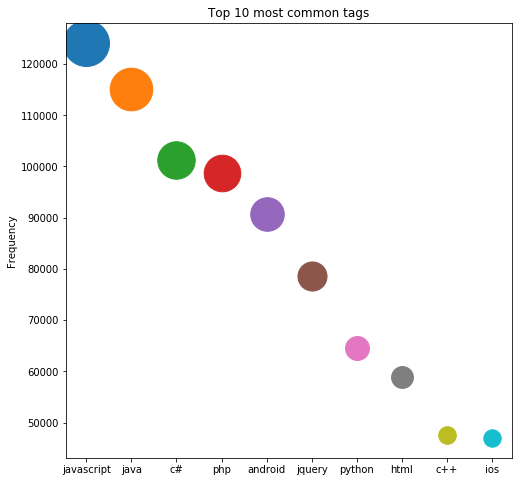

In [23]:
plt.figure(figsize=(8,8))
plt.ylabel("Frequency")
plt.title("Top 10 most common tags")
for i in range(10):
        plt.plot(sorted_x[i][0], sorted_x[i][1],marker='o', linestyle='',ms=area[i]/900, label=sorted_x[i][0])
plt.show()

In [6]:
interested_tags = len(sorted_x)
used_tags= set([])
for i in range(0, interested_tags):
    used_tags.add(sorted_x[i][0])

In [7]:
# We retain only the tags which matter to us now
tags = tags[tags['Tag'].isin(used_tags)]
tags.head(10)

,Id,Tag
0,80,flex
1,80,actionscript-3
3,90,svn
7,120,sql
8,120,asp.net
10,180,algorithm
12,180,colors
14,260,c#
15,260,.net
18,330,c++


In [34]:
tags.to_csv('../input/Tags_Filtered.csv', encoding='latin1',index=False)

In [9]:
del interested_tags, sorted_x, used_tags # free up memory

## HTML tags stripper

In [10]:
# will strip all text according to this regular expression.
TAG_RE = re.compile(r'<[^>]+>')

def strip_tags(text):
    return TAG_RE.sub('', text)

### The Normalizer function will:
* convert to lowercase
* strip stop words and symbols
* strip single characters
* strip HTML characters
* strip words that are all numbers

In [11]:
def normalize(str):
    return ' '.join([word for word in re.sub(r'[^\w]', ' ', strip_tags(str)).lower().split() if word not in cachedStopWords and len(word) > 1 and not word.isdigit()])

## Filtering the Quesitons

In [6]:
questions = pd.read_csv('../input/Questions.csv', encoding='latin1')

In [15]:
questions = questions[questions['Id'].isin(tags['Id'])]
questions.head(10).loc[:,['Id','Title','Body']]

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [16]:
# Normalize question body and title
for index, row in questions.iterrows():
    questions.at[index, 'Body']= normalize(row[6])
    questions.at[index, 'Title']= normalize(row[5])

In [17]:
questions.head(10).loc[:,['Id','Title','Body']]

,Id,Title,Body
0,80,sqlstatement execute multiple queries one stat...,written database generation script sql want ex...
1,90,good branching merging tutorials tortoisesvn,really good tutorials explaining branching mer...
2,120,asp net site maps,anyone got experience creating sql based asp n...
3,180,function creating color wheels,something pseudo solved many times never quite...
4,260,adding scripting functionality net applications,little game written uses database back end tra...
5,330,use nested classes case,working collection classes used video playback...
6,470,homegrown consumption web services,writing web services net app ready consume see...
7,580,deploying sql server databases test live,wonder guys manage deployment database sql ser...
8,650,automatically update version number,would like version property application increm...
9,810,visual studio setup project per user registry ...,trying maintain setup project visual studio ye...


In [19]:
questions.to_csv('../input/Questions_Filtered.csv', encoding='latin1', index=False)

In [19]:
del questions # free up memory

## Filtering the Answers

In [7]:
answers = pd.read_csv('../input/Answers.csv', encoding='latin1')

In [21]:
answers = answers[answers['ParentId'].isin(tags['Id'])]
answers.head(10).loc[:,['Id','Body']]

,Id,Body
0,92,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,<p>I wound up using this. It is a kind of a ha...
2,199,<p>I've read somewhere the human eye can't dis...
3,269,"<p>Yes, I thought about that, but I soon figur..."
4,307,"<p><a href=""http://www.codeproject.com/Article..."
5,332,<p>I would be a bit reluctant to use nested cl...
6,344,<p>You might be able to use IronRuby for that....
7,359,"<P>You could use any of the DLR languages, whi..."
8,473,"<p>No, what you're doing is fine. Don't let th..."
9,529,<p>Isn't it also a factor which order you set ...


In [22]:
for index, row in answers.iterrows():
    answers.at[index, 'Body']= normalize(row[5])

In [23]:
answers.head(10).loc[:,['Id','Body']]

,Id,Body
0,92,version control subversion good resource sourc...
1,124,wound using kind hack actually works pretty we...
2,199,read somewhere human eye distinguish less valu...
3,269,yes thought soon figured another domain specif...
4,307,oleg shilo script solution code project really...
5,332,would bit reluctant use nested classes created...
6,344,might able use ironruby otherwise suggest dire...
7,359,could use dlr languages provide way really eas...
8,473,fine let people confuse written web services n...
9,529,also factor order set colors like use dillie o...


In [22]:
answers.to_csv('../input/Answers_Filtered.csv', encoding='latin1', index=False)

## Manual dimensional compression

In [32]:
tags['Tag'].replace(['sql-server-2005','sql-server-2008'], 'sql-server',inplace=True)
tags['Tag'].replace('c#-4.0', 'c#',inplace=True)
tags['Tag'].replace(['visual-c++', 'c++11'], 'c++',inplace=True)
tags['Tag'].replace(['python-3.x', 'python-2.7'], 'python',inplace=True)
tags['Tag'].replace(['visual-studio-2008','visual-studio-2010','visual-studio-2012','visual-studio-2013','visual-studio-2015'], 'visual-studio',inplace=True)
tags['Tag'].replace(['ruby-on-rails-3', 'ruby-on-rails-4'], 'ruby-on-rails',inplace=True)
tags['Tag'].replace(['angular2', 'angularjs-directive'], 'angularjs',inplace=True)
tags['Tag'].replace(['memory-leaks', 'memory-management'], 'memory',inplace=True)
tags['Tag'].replace('selenium-webdriver', 'selenium',inplace=True)
tags['Tag'].replace('javascript-events', 'javascript',inplace=True)
tags['Tag'].replace(['ios5', 'ios7'], 'ios',inplace=True)
tags['Tag'].replace('opengl-es', 'open-gl',inplace=True)
tags['Tag'].replace(['jquery-ui', 'jquery-plugins', 'jquery-mobile'], 'jquery',inplace=True)
tags['Tag'].replace('nhibernate', 'hibernate',inplace=True)
tags['Tag'].replace('amazon-s3', 'amazon-web-services',inplace=True)
tags['Tag'].replace(['asp.net-mvc', 'asp.net-mvc-3', 'asp.net-mvc-4', 'asp.net-web-api'], 'asp.net',inplace=True)
tags['Tag'].replace(['windows-phone-7', 'windows-phone-8'], 'windows-phone',inplace=True)
tags['Tag'].replace('twitter-bootstrap-3', 'twitter-bootstrap',inplace=True)
tags['Tag'].replace(['laravel-4', 'laravel-5'], 'laravel',inplace=True)
tags['Tag'].replace('django-models','django',inplace=True)
tags['Tag'].replace('jsf-2','jsf',inplace=True)
tags['Tag'].replace('css-3','css',inplace=True)
tags['Tag'].replace('html5','html',inplace=True)
tags['Tag'].replace('google-chrome-extension','google-chrome',inplace=True)
tags['Tag'].replace(['android-activity','android-layout','android-intent','android-asynctask', 'android-listview', 'android-fragments', 'android-studio'], 'android', inplace=True)
tags['Tag'].replace('oracle1lq','oracle',inplace=True)
tags['Tag'].replace('google-maps-api-3','google-maps',inplace=True)
tags['Tag'].replace('foreach', 'for-loop',inplace=True)

In [33]:
len(tags['Tag'].unique())

362